# Part III, Lab 3
## Moments of distribution
1. create functions for mean, var and skew
2. apply your functions to a standard normal distribution of 1000 values
2. check your skew function against `scipy.stats.skew`

In [3]:
%pylab nbagg





Populating the interactive namespace from numpy and matplotlib


In [108]:
a=random.standard_normal((1,1000))
#print(a)

In [109]:
def mean (data):
    N = len(data)
    m = sum(data)/N
    return m

In [110]:
def variance (data, m):
    N = len(data)
    v = 1/(N-1)*sum((data-m)**2)
    return v
    

In [111]:
def skew (data, m, v):
    N = len(data)
    srms = sqrt(v)
    sk = sum(((data-m)/srms)**3)/N
    return sk
    

In [112]:
m = mean(a[0])
print(m)
v = variance(a[0], m)
print(v)
sk = skew(a[0], m, v)
print(sk)


-0.00851914180172
1.02581925341
0.0620187264337


In [113]:
from scipy.stats import skew
skew(a[0])


0.06211187094427874

## Standard normal distribution
1. Create a distribution by adding to a first set of 500 data values that represent a standard normal distribtion a second distribution that you obtain by applying the following operation: $a \rightarrow 0.5a-1.5$. Make a histogram of that combined distribution with 20 bars.
2. Calculate the skew. Repeat the same exercise but applying for the second set the operation $a \rightarrow 0.3a+2.$

<IPython.core.display.Javascript object>


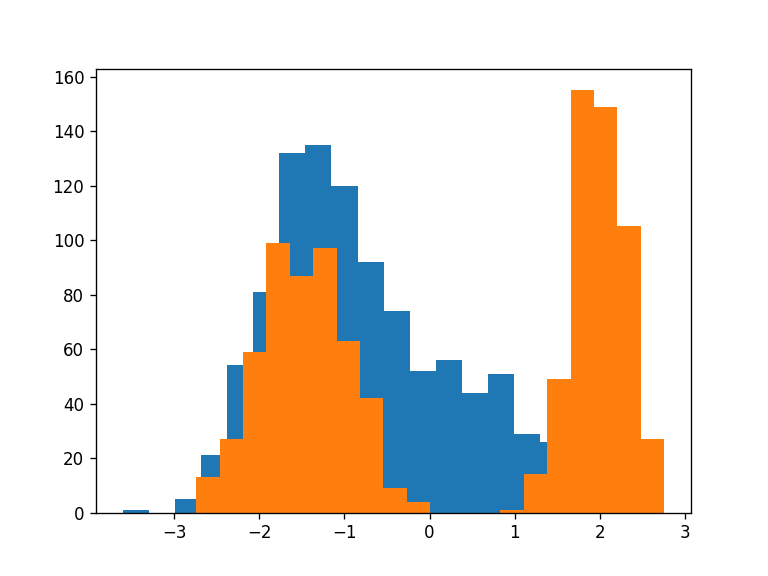

In [136]:
dist=random.standard_normal((2,500))
#print(dist[0])
dist[0] = [0.5*i-1.5 for i in dist[0]]
#print(a[0])

n=20
disth=hist(dist.flatten(),n)



In [137]:
dist[1] = [0.3*i+2 for i in dist[1]]
disth=hist(dist.flatten(),n)

## Least-square fitting
Fit a Gaussian (propability denisty of the normal distribution) to bpth skewed distributions from the previous part.

In [ ]:
from scipy.optimize import curve_fit

In [135]:
def model_func (x,m,v,srms):
    return numpy.exp(-(x-m)**2 / ( 2*srms**2))/(sqrt(2*np.pi*srms^2))
    

In [ ]:
fitparst, covmat = curve_fit(model_func, dist[0], dist[1], p0 )

## Linear correlation


1. create a point cloud by plotting to normal distribtions against each other. Each as 500 values.
2. Create a linear shear mapping transformation matrix `T2 = matrix([[1,1.],[0,1]])` to these double-normal (x,y) data points. Plot both data sets in one plot.
3. Write a function that calculates Pearson's r correlation coeffecient. Calculate the coefficent for both data sets. 
4. Compare your result with the equivalent `scipy.stats` routine.